In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('seaborn')

# Step by Step

In [2]:
x1 = np.array([16, 12, 13, 11, 10, 9, 8, 7, 5, 3, 2, 0])
x2 = np.array([8, 10, 6, 2, 8, -1, 4, 6, -3, -1, -3, 0])

In [3]:
x1_m = x1 - x1.mean()
x2_m = x2 - x2.mean()
print(x1_m)
print(x2_m)

[ 8.  4.  5.  3.  2.  1.  0. -1. -3. -5. -6. -8.]
[ 5.  7.  3. -1.  5. -4.  1.  3. -6. -4. -6. -3.]


In [4]:
# 原本各自的變異量，大概各佔50%的總變異量左右
print(x1_m.var(ddof=1))
print(x2_m.var(ddof=1))

23.09090909090909
21.09090909090909


In [5]:
# 計算他們的covariance matrix
rm = np.cov(x1_m, x2_m)
rm

array([[23.09090909, 16.45454545],
       [16.45454545, 21.09090909]])

In [6]:
# 求covariance matrix的特徵值和特徵向量，特徵值代表轉換成新的基底後的各分量變異數，特徵向量代表新的基底
eig, eigv = np.linalg.eig(rm)
eig

array([38.57581328,  5.6060049 ])

In [7]:
# 新的基底。且新的基底為正交
prin1 = eigv[:, 0]
prin2 = eigv[:, 1]
print('pc1:', prin1)
print('pc2:', prin2)
print('orthogonal:', prin1.dot(prin2))

pc1: [0.72823813 0.68532417]
pc2: [-0.68532417  0.72823813]
orthogonal: 0.0


In [8]:
print('original coordinate')
np.vstack((x1_m, x2_m)).T

original coordinate


array([[ 8.,  5.],
       [ 4.,  7.],
       [ 5.,  3.],
       [ 3., -1.],
       [ 2.,  5.],
       [ 1., -4.],
       [ 0.,  1.],
       [-1.,  3.],
       [-3., -6.],
       [-5., -4.],
       [-6., -6.],
       [-8., -3.]])

In [9]:
print('transform coordinate')
Iv_t = np.linalg.inv(eigv)
transed = np.matmul(Iv_t, np.vstack((x1_m, x2_m))).T
prin1_coord = transed[:, 0]
prin2_coord = transed[:, 1]
np.vstack((prin1_coord, prin2_coord)).T

transform coordinate


array([[ 9.25252593, -1.8414027 ],
       [ 7.71022174,  2.35637025],
       [ 5.69716318, -1.24190646],
       [ 1.49939023, -2.78421065],
       [ 4.88309713,  2.27054233],
       [-2.01305855, -3.59827671],
       [ 0.68532417,  0.72823813],
       [ 1.32773438,  2.87003857],
       [-6.29665943, -2.31345629],
       [-6.38248736,  0.51366832],
       [-8.48137383, -0.25748377],
       [-7.88187759,  3.29787897]])

In [10]:
print('compare')
print('x1_mean:', x1.mean(), ' ,x1_std:', x1.std())
print('x2_mean:', x2.mean(), ' ,x1_std:', x2.std())
print('pc1_mean:', prin1_coord.mean(), ' ,pc1_std:', prin1_coord.std())
print('pc2_mean:', prin2_coord.mean(), ' ,pc2_std:', prin2_coord.std())

compare
x1_mean: 8.0  ,x1_std: 4.600724580614087
x2_mean: 3.0  ,x1_std: 4.396968652757639
pc1_mean: 1.4802973661668753e-16  ,pc1_std: 5.946525218404135
pc2_mean: 7.401486830834377e-17  ,pc2_std: 2.266900488968066


In [11]:
# 可以看出轉換前，x1和x2彼此之間有0.7的相關係數，代表他們有相關性。而轉換成的prin1和prin2的相關係數接近0
print('pearson correlation matrix')
print(np.corrcoef([x1_m, x2_m, prin1_coord, prin2_coord]))

pearson correlation matrix
[[ 1.00000000e+00  7.45620301e-01  9.41261828e-01 -3.37677614e-01]
 [ 7.45620301e-01  1.00000000e+00  9.26842511e-01  3.75450341e-01]
 [ 9.41261828e-01  9.26842511e-01  1.00000000e+00  1.48247376e-16]
 [-3.37677614e-01  3.75450341e-01  1.48247376e-16  1.00000000e+00]]


In [12]:
# 轉換後的prin1比原本的x1或x2的解釋變異量都還大
print('ratio of total variance')
total_var = x1_m.var() + x2_m.var()
print('x1_m: {:.3f} %'.format(x1_m.var() / total_var))
print('x2_m: {:.3f} %'.format(x2_m.var() / total_var))
print('prin1_coord: {:.3f} %'.format(prin1_coord.var() / total_var))
print('prin2_coord: {:.3f} %'.format(prin2_coord.var() / total_var))

ratio of total variance
x1_m: 0.523 %
x2_m: 0.477 %
prin1_coord: 0.873 %
prin2_coord: 0.127 %


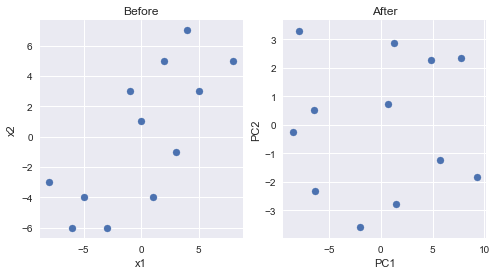

In [13]:
fig, ax = plt.subplots(ncols=2, figsize=(8, 4))
ax[0].scatter(x1_m, x2_m)
ax[0].set_xlabel('x1')
ax[0].set_ylabel('x2')
ax[0].set_title('Before')

ax[1].scatter(prin1_coord, prin2_coord)
ax[1].set_xlabel('PC1')
ax[1].set_ylabel('PC2')
ax[1].set_title('After');

# Custom Class

In [14]:
import numpy as np

class PrincipalComponentAnalysis:
    def __init__(self, n_component):
        self.n_component = n_component
    
    def fit(self, X):
        self.X = X
        self.mean_ = X.mean(axis=0)
        self.covariance_ = np.cov(X, rowvar=False)
        
        eig, eigv = np.linalg.eig(self.covariance_)
        idx = eig.argsort()[::-1]
        eig = eig[idx]
        eigv = eigv[:, idx]
        self.explained_variance_ = eig[:self.n_component]
        self.components_ = eigv[:, :self.n_component]   # self.component will be transpose to scikit-learn PCA 
        
        self.explained_variance_ratio_ = (eig / eig.sum())[:self.n_component]
        
    def transform(self, X):
        X = X - self.mean_
        Iv_t = self.components_.T     # eigen vectors are orthogonal, so the inverse is equal to transpose
        transed_x = np.matmul(Iv_t, X.T).T
        return transed_x[:, :self.n_component]
    
    def fit_transform(self, X):
        self.fit(X)
        return self.transform(X)
    
    def inverse_transform(self, X):
        Iv = self.components_
        return np.matmul(X, Iv.T) + self.mean_

### test and compare to scikit-learn

In [15]:
X = np.array([[16, 12, 13, 11, 10, 9, 8, 7, 5, 3, 2, 0], [8, 10, 6, 2, 8, -1, 4, 6, -3, -1, -3, 0]]).T
X

array([[16,  8],
       [12, 10],
       [13,  6],
       [11,  2],
       [10,  8],
       [ 9, -1],
       [ 8,  4],
       [ 7,  6],
       [ 5, -3],
       [ 3, -1],
       [ 2, -3],
       [ 0,  0]])

In [16]:
pca = PrincipalComponentAnalysis(n_component=2)
pca.fit(X)

print('covariance:\n', pca.covariance_)
print('\ncomponents (eigv of covariance matrix):\n', pca.components_)
print('\nexplained variance (eig of covariance matrix):\n', pca.explained_variance_)
print('\nexplained variance ratio:\n', pca.explained_variance_ratio_)
print('\ntransform [[10, 20], [15, 12]] to new PC coorninate:\n', pca.transform(np.array([[10, 20], [15, 12]])))
print('\ninverse transform [[13.1, 11.0]] to original coornate:\n', pca.inverse_transform(np.array([[13.1, 11.0]])))

covariance:
 [[23.09090909 16.45454545]
 [16.45454545 21.09090909]]

components (eigv of covariance matrix):
 [[ 0.72823813 -0.68532417]
 [ 0.68532417  0.72823813]]

explained variance (eig of covariance matrix):
 [38.57581328  5.6060049 ]

explained variance ratio:
 [0.87311512 0.12688488]

transform [[10, 20], [15, 12]] to new PC coorninate:
 [[13.10698718 11.00939994]
 [11.26558448  1.75687401]]

inverse transform [[13.1, 11.0]] to original coornate:
 [[10.00135367 19.98836612]]


In [17]:
# compare to scikit-learn PCA
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
pca.fit(X)

print('covariance:\n', pca.get_covariance())
print('\ncomponents (eigv of covariance matrix):\n', pca.components_)
print('\nexplained variance (eig of covariance matrix): \n', pca.explained_variance_)
print('\nexplained variance ratio:\n', pca.explained_variance_ratio_)
print('\ntransform [[10, 20], [15, 12]] to new PC coorninate:\n', pca.transform(np.array([[10, 20], [15, 12]])))
print('\ninverse transform [[13.1, -11.0]] to original coornate:\n', pca.inverse_transform(np.array([[13.1, -11.0]])))

covariance:
 [[23.09090909 16.45454545]
 [16.45454545 21.09090909]]

components (eigv of covariance matrix):
 [[ 0.72823813  0.68532417]
 [ 0.68532417 -0.72823813]]

explained variance (eig of covariance matrix): 
 [38.57581328  5.6060049 ]

explained variance ratio:
 [0.87311512 0.12688488]

transform [[10, 20], [15, 12]] to new PC coorninate:
 [[ 13.10698718 -11.00939994]
 [ 11.26558448  -1.75687401]]

inverse transform [[13.1, -11.0]] to original coornate:
 [[10.00135367 19.98836612]]


### test 2

In [18]:
X = np.array([
    [24.5, 94.5, 73.9, 80.1, 41.6],
    [26.5, 91.0, 67.5, 74.6, 53.3],
    [29.7, 100.8, 61.4, 104.0, 59.6],
    [22.8, 86.6, 65.3, 118.4, 51.2],
    [26.7, 86.7, 62.7, 105.9, 51.2], 
    [25.3, 102.5, 63.3, 99.3, 45.6],
    [22.8, 88.8, 52.4, 110.9, 46.8],
    [23.3, 85.5, 62.5, 117.9, 41.8],
    [24.1, 93.7, 51.5, 109.7, 52.4],
    [29.3, 105.9, 80.2, 133.2, 61.7],
    [22.3, 83.6, 67.8, 108.6, 42.4],
    [26.1, 88.9, 65.4, 100.9, 43.2],
    [26.9, 89.3, 56.2, 82.7, 38.4],
    [20.3, 89.6, 53.8, 111.8, 53.9],
    [24.6, 92.2, 51.9, 106.0, 50.7],
    [30.8, 110.7, 66.0, 107.3, 62.6],
    [24.5, 92.3, 66.7, 98.0, 61.7],
    [26.2, 95.4, 60.2, 117.1, 49.3],
    [26.5, 92.4, 60.8, 115.1, 46.2],
    [25.5, 83.7, 57.0, 92.8, 35.4],
    [26.3, 87.1, 58.3, 101.8, 41.5],
    [22.5, 77.7, 62.0, 91.1, 44.9],
    [24.2, 93.8, 66.0, 81.6, 46.2]
])

In [19]:
# unnormalize data
pca = PrincipalComponentAnalysis(n_component=5)
pca.fit(X)

In [20]:
print('unnormalize data\n')

print('covariance:\n', pca.covariance_)
print('\ncomponents (eigv of covariance matrix):\n', pca.components_)
print('\nexplained variance (eig of covariance matrix): \n', pca.explained_variance_)
print('\nexplained variance ratio:\n', pca.explained_variance_ratio_)

unnormalize data

covariance:
 [[  6.2844664   12.91096838   5.71905138   1.31037549   7.28513834]
 [ 12.91096838  57.07711462  17.50752964  22.69187747  36.29478261]
 [  5.71905138  17.50752964  48.30588933  -0.27503953  13.44347826]
 [  1.31037549  22.69187747  -0.27503953 202.75628458  38.76241107]
 [  7.28513834  36.29478261  13.44347826  38.76241107  57.80055336]]

components (eigv of covariance matrix):
 [[-0.02848905 -0.16532108  0.02135748 -0.18972574 -0.96716354]
 [-0.2001224  -0.63218494  0.25420475 -0.65862454  0.24877074]
 [-0.0416723  -0.44215032 -0.88874949  0.10765906  0.03606094]
 [-0.93885906  0.31435473 -0.12135003 -0.06904699 -0.01521357]
 [-0.27558389 -0.52791603  0.36100184  0.71684022 -0.03429221]]

explained variance (eig of covariance matrix): 
 [218.99867893  91.72316894  37.66268981  20.81054128   3.02922934]

explained variance ratio:
 [0.58835136 0.24641907 0.10118278 0.0559086  0.00813818]


In [21]:
# use normalize
X = (X - X.mean(axis=0)) / X.std(axis=0, ddof=1)

In [22]:
pca = PrincipalComponentAnalysis(n_component=3)
pca.fit(X)

print('normalize data\n')
print('covariance:\n', pca.covariance_)
print('\ncomponents (eigv of covariance matrix):\n', pca.components_)
print('\nexplained variance (eig of covariance matrix): \n', pca.explained_variance_)
print('\nexplained variance ratio:\n', pca.explained_variance_ratio_)
print('\ntransform [[10, 20, 30, 40, 50]] to new PC coorninate:\n', pca.transform(np.array([[10, 20, 30, 40, 50]])))
print('\ninverse transform [[61, -30, -27]] to original coornate:\n', pca.inverse_transform(np.array([[61, -30, -27]])))

normalize data

covariance:
 [[ 1.          0.68170049  0.32823868  0.03670916  0.38224129]
 [ 0.68170049  1.          0.33342167  0.21093676  0.63189831]
 [ 0.32823868  0.33342167  1.         -0.00277912  0.2544167 ]
 [ 0.03670916  0.21093676 -0.00277912  1.          0.3580615 ]
 [ 0.38224129  0.63189831  0.2544167   0.3580615   1.        ]]

components (eigv of covariance matrix):
 [[ 0.49614868  0.30861972  0.38639398]
 [ 0.57570231  0.04380176  0.26247227]
 [ 0.33956956  0.43080905 -0.83463952]
 [ 0.22498981 -0.79677694 -0.29160659]
 [ 0.50643404 -0.28702846  0.01226602]]

explained variance (eig of covariance matrix): 
 [2.42246795 1.10467489 0.73848053]

explained variance ratio:
 [0.48449359 0.22093498 0.14769611]

transform [[10, 20, 30, 40, 50]] to new PC coorninate:
 [[ 60.98391422 -29.33599679 -26.97676336]]

inverse transform [[61, -30, -27]] to original coornate:
 [[10.57384051 26.71703687 30.32473855 45.50106507 39.17214759]]


In [23]:
# compare to scikit-learn PCA
from sklearn.decomposition import PCA

pca = PCA(n_components=3)
pca.fit(X)

print('scikit-learn normalize data\n')
print('covariance:\n', pca.get_covariance())
print('\ncomponents (eigv of covariance matrix):\n', pca.components_)
print('\nexplained variance (eig of covariance matrix): \n', pca.explained_variance_)
print('\nexplained variance ratio:\n', pca.explained_variance_ratio_)
print('\ntransform [[10, 20, 30, 40, 50]] to new PC coorninate:\n', pca.transform(np.array([[10, 20, 30, 40, 50]])))
print('\ninverse transform [[61, -30, -27]] to original coornate:\n', pca.inverse_transform(np.array([[61, -30, 27]])))

scikit-learn normalize data

covariance:
 [[ 0.99879996  0.63468264  0.32457909  0.00624347  0.45285432]
 [ 0.63468264  1.07537     0.33436626  0.21205787  0.59115099]
 [ 0.32457909  0.33436626  0.99970307 -0.0057585   0.2584509 ]
 [ 0.00624347  0.21205787 -0.0057585   0.97099597  0.4015171 ]
 [ 0.45285432  0.59115099  0.2584509   0.4015171   0.95513099]]

components (eigv of covariance matrix):
 [[ 0.49614868  0.57570231  0.33956956  0.22498981  0.50643404]
 [ 0.30861972  0.04380176  0.43080905 -0.79677694 -0.28702846]
 [-0.38639398 -0.26247227  0.83463952  0.29160659 -0.01226602]]

explained variance (eig of covariance matrix): 
 [2.42246795 1.10467489 0.73848053]

explained variance ratio:
 [0.48449359 0.22093498 0.14769611]

transform [[10, 20, 30, 40, 50]] to new PC coorninate:
 [[ 60.98391422 -29.33599679  26.97676336]]

inverse transform [[61, -30, -27]] to original coornate:
 [[10.57384051 26.71703687 30.32473855 45.50106507 39.17214759]]


# Scikit-learn PCA

In [24]:
from sklearn.decomposition import PCA

In [25]:
X = np.array([[16, 12, 13, 11, 10, 9, 8, 7, 5, 3, 2, 0], [8, 10, 6, 2, 8, -1, 4, 6, -3, -1, -3, 0]]).T
pca = PCA(n_components=2)
pca.fit(X)

PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [26]:
# 就是原本的covariance matrix
pca.get_covariance()

array([[23.09090909, 16.45454545],
       [16.45454545, 21.09090909]])

In [27]:
# 解釋變異量就是eigenvalue
pca.explained_variance_

array([38.57581328,  5.6060049 ])

In [28]:
# 分量就是解covariance matrix的eigenvector
pca.components_

array([[ 0.72823813,  0.68532417],
       [ 0.68532417, -0.72823813]])

In [29]:
# 這就是兩個新主成分各自的變異數佔總變異數的比例
pca.explained_variance_ratio_

array([0.87311512, 0.12688488])

In [30]:
# 原本的座標經過PCA轉換過後的座標
pca.fit_transform(np.vstack((x1_m, x2_m)).T)

array([[ 9.25252593,  1.8414027 ],
       [ 7.71022174, -2.35637025],
       [ 5.69716318,  1.24190646],
       [ 1.49939023,  2.78421065],
       [ 4.88309713, -2.27054233],
       [-2.01305855,  3.59827671],
       [ 0.68532417, -0.72823813],
       [ 1.32773438, -2.87003857],
       [-6.29665943,  2.31345629],
       [-6.38248736, -0.51366832],
       [-8.48137383,  0.25748377],
       [-7.88187759, -3.29787897]])

In [31]:
# 所以如果要讓它降成一維，就會取變異量38.57的那個主成分
pca = PCA(n_components=1)
pca.fit_transform(X)

array([[ 9.25252593],
       [ 7.71022174],
       [ 5.69716318],
       [ 1.49939023],
       [ 4.88309713],
       [-2.01305855],
       [ 0.68532417],
       [ 1.32773438],
       [-6.29665943],
       [-6.38248736],
       [-8.48137383],
       [-7.88187759]])